In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

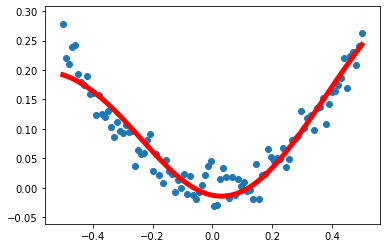

In [18]:
# 生成200行一列的数据
x_data = np.linspace(-0.5,0.5,100)[:,np.newaxis]
noise = np.random.normal(0.0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

weights1 = tf.Variable(tf.random_normal([1,10]))
bias1 = tf.Variable(tf.zeros([1,1]))
L1 = tf.nn.tanh(tf.matmul(x,weights1)+bias1)

weights2 = tf.Variable(tf.random_normal([10,1]))
bias2 = tf.Variable(tf.zeros([1,1]))
y_pre = tf.nn.tanh(tf.matmul(L1,weights2)+bias2)
                       
loss = tf.reduce_mean(tf.square(y-y_pre))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    # 变量初始化
    sess.run(init)
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    # 获得预测值
    prediction = sess.run(y_pre,feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data,y_data)
    # r 是使用红色 - 是使用实线 lw 是线的宽度
    plt.plot(x_data,prediction,'r-',lw=5)
    plt.show()